In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:06<00:00, 241MB/s]
100% 1.06G/1.06G [00:06<00:00, 180MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,BatchNormalization,Dropout
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [19]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(224,224)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(224,224)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [21]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [22]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def build_alexnet(input_shape=(224, 224, 3)):
    model = Sequential()

    model.add(Conv2D(filters=96, input_shape=input_shape, kernel_size=(11, 11), strides=(4, 4), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())

    model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())

    model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    return model

model = build_alexnet()



In [29]:
from keras import optimizers
model.compile(loss = "binary_crossentropy", optimizer = optimizers.SGD(lr=0.00001), metrics=["accuracy"])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 56, 56, 96)        34944     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 28, 28, 96)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_18 (Ba  (None, 28, 28, 96)        384       
 tchNormalization)                                               
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 256)       614656    
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 14, 14, 256)       0         
 ng2D)                                                           
                                                      

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 88s 133ms/step - loss: 0.7675 - accuracy: 0.6241 - val_loss: 0.6028 - val_accuracy: 0.6630
Epoch 2/10
625/625 [==============================] - 49s 79ms/step - loss: 0.5592 - accuracy: 0.7170 - val_loss: 0.6223 - val_accuracy: 0.6522
Epoch 3/10
625/625 [==============================] - 47s 74ms/step - loss: 0.4723 - accuracy: 0.7720 - val_loss: 0.7635 - val_accuracy: 0.5992
Epoch 4/10
625/625 [==============================] - 50s 79ms/step - loss: 0.4027 - accuracy: 0.8170 - val_loss: 0.4805 - val_accuracy: 0.7590
Epoch 5/10
625/625 [==============================] - 47s 75ms/step - loss: 0.3422 - accuracy: 0.8482 - val_loss: 0.4446 - val_accuracy: 0.7922
Epoch 6/10
625/625 [==============================] - 50s 80ms/step - loss: 0.2975 - accuracy: 0.8706 - val_loss: 0.3530 - val_accuracy: 0.8406
Epoch 7/10
625/625 [==============================] - 45s 72ms/step - loss: 0.2569 - accuracy: 0.8881 - val_loss: 0.3568 - val_accuracy

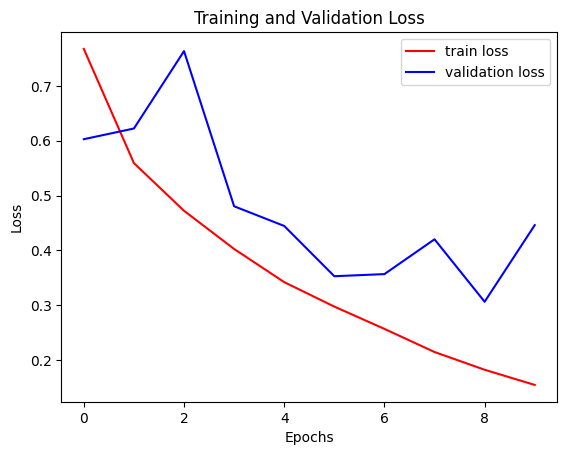

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='red', label='train loss')
plt.plot(history.history['val_loss'], color='blue', label='validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

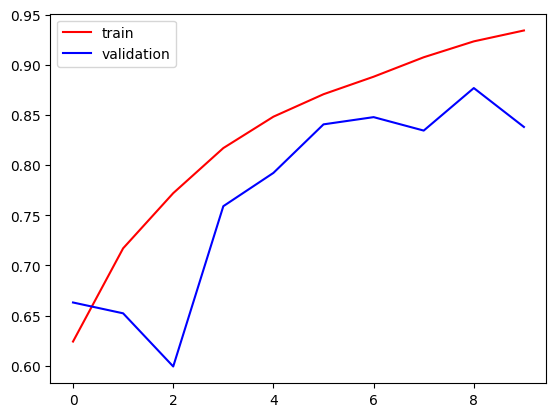

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()